In [1]:
# consensus model
# The average probability was used as the predicted score for two-algorithms-combined or three-algorithms-combined consensus models
# prob来算
import os
import pandas as pd
from itertools import combinations
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt

algorithm_list = ['KNN', 'NB', 'RF', 'SVC', 'XGBoost', 'AttentiveFP', 'chemberta', 'DMPNN', 'GCN']


In [2]:
# 重新排序文件夹中的每个文件，保证靶点顺序一致
# folder_path = './pred_proba'
# for filename in os.listdir(folder_path):
#     if filename.endswith('.xlsx'):
#         file = os.path.join(folder_path, filename)
#         df = pd.read_excel(file)
#         df = df.sort_values(by=['dataset', 'target', 'SMILES', 'y_test'])
#         df.to_excel(file, index=False)

In [3]:
# 2个模型的consensus，算auc、ap、F1、Kappa

all_df = pd.read_excel('./pred_proba/all.xlsx')

al_com_2 = ['_'.join(combination) for combination in combinations(algorithm_list, 2)]
print(al_com_2)

dataset_auc_scores={}
dataset_ap_scores={}
dataset_f1_scores={}
dataset_kappa_scores={}

for i in al_com_2:
    print(i)
    prob1 = pd.read_excel('./pred_proba/' + i.split('_')[0] + '_pred_proba.xlsx')['y_pred_proba']
    prob2 = pd.read_excel('./pred_proba/' + i.split('_')[1] + '_pred_proba.xlsx')['y_pred_proba']
    avg_values = (prob1 + prob2) / 2
    all_df['average_proba'] = avg_values
    all_df['y_pred'] = all_df['average_proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    grouped = all_df.groupby(['dataset', 'target'])

    auc_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            auc_scores.setdefault(dataset, []).append(roc_auc_score(group['y_test'], group['average_proba']))
    dataset_auc_scores[i] = {dataset: sum(auc_scores[dataset]) / len(auc_scores[dataset]) for dataset in auc_scores}
    for dataset, auc_score in dataset_auc_scores[i].items():
        print(f"{dataset}: {auc_score}")
    print('\n')


    ap_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            ap_scores.setdefault(dataset, []).append(average_precision_score(group['y_test'], group['average_proba']))
    dataset_ap_scores[i] = {dataset: sum(ap_scores[dataset]) / len(ap_scores[dataset]) for dataset in ap_scores}
    for dataset, ap_score in dataset_ap_scores[i].items():
        print(f"{dataset}: {ap_score}")
    print('\n')


    f1_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            f1_scores.setdefault(dataset, []).append(f1_score(group['y_test'], group['y_pred']))
    dataset_f1_scores[i] = {dataset: sum(f1_scores[dataset]) / len(f1_scores[dataset]) for dataset in f1_scores}
    for dataset, f1_score_ in dataset_f1_scores[i].items():
        print(f"{dataset}: {f1_score_}")
    print('\n')


    kappa_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            kappa_scores.setdefault(dataset, []).append(cohen_kappa_score(group['y_test'], group['y_pred']))
    dataset_kappa_scores[i] = {dataset: sum(kappa_scores[dataset]) / len(kappa_scores[dataset]) for dataset in kappa_scores}
    for dataset, kappa_score in dataset_kappa_scores[i].items():
        print(f"{dataset}: {kappa_score}")
    print('\n')

    all_df.to_excel(f'./consensus/{i}.xlsx', index=False)

dataset_names = ['TCM2000_100t', 'TCM2000_30t', 'TCM2000_50t', 'TCM2000_80t', 'TCM_100t', 'TCM_30t', 'TCM_50t', 'TCM_80t']

df_auc = pd.DataFrame(dataset_auc_scores)
df_auc.insert(0, 'Dataset Name', dataset_names)
df_auc.to_excel('./consensus_2_auc.xlsx', index=False)

df_ap = pd.DataFrame(dataset_ap_scores)
df_ap.insert(0, 'Dataset Name', dataset_names)
df_ap.to_excel('./consensus_2_ap.xlsx', index=False)

df_f1 = pd.DataFrame(dataset_f1_scores)
df_f1.insert(0, 'Dataset Name', dataset_names)
df_f1.to_excel('./consensus_2_f1.xlsx', index=False)

df_kappa = pd.DataFrame(dataset_kappa_scores)
df_kappa.insert(0, 'Dataset Name', dataset_names)
df_kappa.to_excel('./consensus_2_kappa.xlsx', index=False)

['KNN_NB', 'KNN_RF', 'KNN_SVC', 'KNN_XGBoost', 'KNN_AttentiveFP', 'KNN_chemberta', 'KNN_DMPNN', 'KNN_GCN', 'NB_RF', 'NB_SVC', 'NB_XGBoost', 'NB_AttentiveFP', 'NB_chemberta', 'NB_DMPNN', 'NB_GCN', 'RF_SVC', 'RF_XGBoost', 'RF_AttentiveFP', 'RF_chemberta', 'RF_DMPNN', 'RF_GCN', 'SVC_XGBoost', 'SVC_AttentiveFP', 'SVC_chemberta', 'SVC_DMPNN', 'SVC_GCN', 'XGBoost_AttentiveFP', 'XGBoost_chemberta', 'XGBoost_DMPNN', 'XGBoost_GCN', 'AttentiveFP_chemberta', 'AttentiveFP_DMPNN', 'AttentiveFP_GCN', 'chemberta_DMPNN', 'chemberta_GCN', 'DMPNN_GCN']
KNN_NB
TCM2000_100t: 0.6667435594909258
TCM2000_30t: 0.6557548135321598
TCM2000_50t: 0.6703323314673886
TCM2000_80t: 0.673748159983901
TCM_100t: 0.654726343958461
TCM_30t: 0.5927245480825932
TCM_50t: 0.5827481750714298
TCM_80t: 0.6571328710816329


TCM2000_100t: 0.798499761184685
TCM2000_30t: 0.8135107883530248
TCM2000_50t: 0.8148140122349703
TCM2000_80t: 0.8099176973960271
TCM_100t: 0.7314919114922067
TCM_30t: 0.7925466336465287
TCM_50t: 0.77625571969973

In [3]:
# 3个模型的consensus，算auc、ap、F1、Kappa

all_df = pd.read_excel('./pred_proba/all.xlsx')

al_com_3 = ['_'.join(combination) for combination in combinations(algorithm_list, 3)]
print(al_com_3)

dataset_auc_scores={}
dataset_ap_scores={}
dataset_f1_scores={}
dataset_kappa_scores={}

for i in al_com_3:
    print(i)
    prob1 = pd.read_excel('./pred_proba/' + i.split('_')[0] + '_pred_proba.xlsx')['y_pred_proba']
    prob2 = pd.read_excel('./pred_proba/' + i.split('_')[1] + '_pred_proba.xlsx')['y_pred_proba']
    prob3 = pd.read_excel('./pred_proba/' + i.split('_')[2] + '_pred_proba.xlsx')['y_pred_proba']
    avg_values = (prob1 + prob2 + prob3) / 3
    all_df['average_proba'] = avg_values
    all_df['y_pred'] = all_df['average_proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    grouped = all_df.groupby(['dataset', 'target'])

    auc_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            auc_scores.setdefault(dataset, []).append(roc_auc_score(group['y_test'], group['average_proba']))
    dataset_auc_scores[i] = {dataset: sum(auc_scores[dataset]) / len(auc_scores[dataset]) for dataset in auc_scores}
    for dataset, auc_score in dataset_auc_scores[i].items():
        print(f"{dataset}: {auc_score}")
    print('\n')


    ap_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            ap_scores.setdefault(dataset, []).append(average_precision_score(group['y_test'], group['average_proba']))
    dataset_ap_scores[i] = {dataset: sum(ap_scores[dataset]) / len(ap_scores[dataset]) for dataset in ap_scores}
    for dataset, ap_score in dataset_ap_scores[i].items():
        print(f"{dataset}: {ap_score}")
    print('\n')


    f1_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            f1_scores.setdefault(dataset, []).append(f1_score(group['y_test'], group['y_pred']))
    dataset_f1_scores[i] = {dataset: sum(f1_scores[dataset]) / len(f1_scores[dataset]) for dataset in f1_scores}
    for dataset, f1_score_ in dataset_f1_scores[i].items():
        print(f"{dataset}: {f1_score_}")
    print('\n')


    kappa_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            kappa_scores.setdefault(dataset, []).append(cohen_kappa_score(group['y_test'], group['y_pred']))
    dataset_kappa_scores[i] = {dataset: sum(kappa_scores[dataset]) / len(kappa_scores[dataset]) for dataset in kappa_scores}
    for dataset, kappa_score in dataset_kappa_scores[i].items():
        print(f"{dataset}: {kappa_score}")
    print('\n')

    all_df.to_excel(f'./consensus/{i}.xlsx', index=False)

dataset_names = ['TCM2000_100t', 'TCM2000_30t', 'TCM2000_50t', 'TCM2000_80t', 'TCM_100t', 'TCM_30t', 'TCM_50t', 'TCM_80t']

df_auc = pd.DataFrame(dataset_auc_scores)
df_auc.insert(0, 'Dataset Name', dataset_names)
df_auc.to_excel('./consensus_3_auc.xlsx', index=False)

df_ap = pd.DataFrame(dataset_ap_scores)
df_ap.insert(0, 'Dataset Name', dataset_names)
df_ap.to_excel('./consensus_3_ap.xlsx', index=False)

df_f1 = pd.DataFrame(dataset_f1_scores)
df_f1.insert(0, 'Dataset Name', dataset_names)
df_f1.to_excel('./consensus_3_f1.xlsx', index=False)

df_kappa = pd.DataFrame(dataset_kappa_scores)
df_kappa.insert(0, 'Dataset Name', dataset_names)
df_kappa.to_excel('./consensus_3_kappa.xlsx', index=False)

['KNN_NB_RF', 'KNN_NB_SVC', 'KNN_NB_XGBoost', 'KNN_NB_AttentiveFP', 'KNN_NB_chemberta', 'KNN_NB_DMPNN', 'KNN_NB_GCN', 'KNN_RF_SVC', 'KNN_RF_XGBoost', 'KNN_RF_AttentiveFP', 'KNN_RF_chemberta', 'KNN_RF_DMPNN', 'KNN_RF_GCN', 'KNN_SVC_XGBoost', 'KNN_SVC_AttentiveFP', 'KNN_SVC_chemberta', 'KNN_SVC_DMPNN', 'KNN_SVC_GCN', 'KNN_XGBoost_AttentiveFP', 'KNN_XGBoost_chemberta', 'KNN_XGBoost_DMPNN', 'KNN_XGBoost_GCN', 'KNN_AttentiveFP_chemberta', 'KNN_AttentiveFP_DMPNN', 'KNN_AttentiveFP_GCN', 'KNN_chemberta_DMPNN', 'KNN_chemberta_GCN', 'KNN_DMPNN_GCN', 'NB_RF_SVC', 'NB_RF_XGBoost', 'NB_RF_AttentiveFP', 'NB_RF_chemberta', 'NB_RF_DMPNN', 'NB_RF_GCN', 'NB_SVC_XGBoost', 'NB_SVC_AttentiveFP', 'NB_SVC_chemberta', 'NB_SVC_DMPNN', 'NB_SVC_GCN', 'NB_XGBoost_AttentiveFP', 'NB_XGBoost_chemberta', 'NB_XGBoost_DMPNN', 'NB_XGBoost_GCN', 'NB_AttentiveFP_chemberta', 'NB_AttentiveFP_DMPNN', 'NB_AttentiveFP_GCN', 'NB_chemberta_DMPNN', 'NB_chemberta_GCN', 'NB_DMPNN_GCN', 'RF_SVC_XGBoost', 'RF_SVC_AttentiveFP', 'RF_S

In [4]:
# 跟单个模型的对比一下

algorithm_list = ['KNN', 'NB', 'RF', 'SVC', 'XGBoost', 'AttentiveFP', 'chemberta', 'DMPNN', 'GCN']

max_auc_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

for i in algorithm_list:
    print(i)
    df = pd.read_excel('./pred_proba/' + i + '_pred_proba.xlsx') 
    grouped = df.groupby(['dataset', 'target'])
    auc_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            score = roc_auc_score(group['y_test'], group['y_pred_proba'])
            auc_scores.setdefault(dataset, []).append(score)
    dataset_auc_scores = {dataset: sum(auc_scores[dataset]) / len(auc_scores[dataset]) for dataset in auc_scores}
    for dataset, auc_score in dataset_auc_scores.items():
        if max_auc_scores[dataset] < auc_score:
            max_auc_scores[dataset] = auc_score
        print(f"{dataset}: {auc_score}")
    print('\n')
print(max_auc_scores)

max_ap_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

for i in algorithm_list:
    print(i)
    df = pd.read_excel('./pred_proba/' + i + '_pred_proba.xlsx') 
    grouped = df.groupby(['dataset', 'target'])
    ap_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            score = average_precision_score(group['y_test'], group['y_pred_proba'])
            ap_scores.setdefault(dataset, []).append(score)
    dataset_ap_scores = {dataset: sum(ap_scores[dataset]) / len(ap_scores[dataset]) for dataset in ap_scores}
    for dataset, ap_score in dataset_ap_scores.items():
        if max_ap_scores[dataset] < ap_score:
            max_ap_scores[dataset] = ap_score
        print(f"{dataset}: {ap_score}")
    print('\n')
print(max_ap_scores)

max_f1_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

for i in algorithm_list:
    print(i)
    df = pd.read_excel('./pred_proba/' + i + '_pred_proba.xlsx') 
    df['y_pred'] = df['y_pred_proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    grouped = df.groupby(['dataset', 'target'])
    f1_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            score = f1_score(group['y_test'], group['y_pred'])
            f1_scores.setdefault(dataset, []).append(score)
    dataset_f1_scores = {dataset: sum(f1_scores[dataset]) / len(f1_scores[dataset]) for dataset in f1_scores}
    for dataset, f1_score_ in dataset_f1_scores.items():
        if max_f1_scores[dataset] < f1_score_:
            max_f1_scores[dataset] = f1_score_
        print(f"{dataset}: {f1_score_}")
    print('\n')
print(max_f1_scores)

max_kappa_scores = {'TCM2000_100t': 0,
'TCM2000_30t': 0,
'TCM2000_50t': 0,
'TCM2000_80t': 0,
'TCM_100t': 0,
'TCM_30t': 0,
'TCM_50t': 0,
'TCM_80t': 0}

for i in algorithm_list:
    print(i)
    df = pd.read_excel('./pred_proba/' + i + '_pred_proba.xlsx') 
    df['y_pred'] = df['y_pred_proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    grouped = df.groupby(['dataset', 'target'])
    kappa_scores = {}
    for (dataset, target), group in grouped:
        if len(set(group['y_test'])) > 1:  # Check if there's more than one class in y_true
            score = cohen_kappa_score(group['y_test'], group['y_pred'])
            kappa_scores.setdefault(dataset, []).append(score)
    dataset_kappa_scores = {dataset: sum(kappa_scores[dataset]) / len(kappa_scores[dataset]) for dataset in kappa_scores}
    for dataset, kappa_score in dataset_kappa_scores.items():
        if max_kappa_scores[dataset] < kappa_score:
            max_kappa_scores[dataset] = kappa_score
        print(f"{dataset}: {kappa_score}")
    print('\n')
print(max_kappa_scores)


KNN
TCM2000_100t: 0.6201264704128108
TCM2000_30t: 0.5914483707617246
TCM2000_50t: 0.6188961326460829
TCM2000_80t: 0.6156379904594084
TCM_100t: 0.6185292016290308
TCM_30t: 0.5757668441744193
TCM_50t: 0.5678728053926355
TCM_80t: 0.6141173239570176


NB
TCM2000_100t: 0.6582443638438417
TCM2000_30t: 0.6359599605179074
TCM2000_50t: 0.6413286946612738
TCM2000_80t: 0.6686494547334221
TCM_100t: 0.6232037631081333
TCM_30t: 0.592047445734933
TCM_50t: 0.587729236021708
TCM_80t: 0.6342508730340768


RF
TCM2000_100t: 0.6289729453461999
TCM2000_30t: 0.5824531628533376
TCM2000_50t: 0.6210866883929043
TCM2000_80t: 0.6550951619034011
TCM_100t: 0.6148074142997114
TCM_30t: 0.628120853172774
TCM_50t: 0.6285214823336234
TCM_80t: 0.6364960191881116


SVC
TCM2000_100t: 0.627899264765134
TCM2000_30t: 0.6320678617248161
TCM2000_50t: 0.6458096741755441
TCM2000_80t: 0.6224639961243509
TCM_100t: 0.6634220015274943
TCM_30t: 0.6178899319364382
TCM_50t: 0.6351054734509125
TCM_80t: 0.6355054986274378


XGBoost
TCM200

TCM2000_80t 0.733015730776463
{'KNN_chemberta': 0.736937455150684, 'NB_chemberta': 0.7340248047142154, 'RF_chemberta': 0.7104605301458904, 'SVC_chemberta': 0.6934891848054134, 'NB_DMPNN': 0.6867190987877286, 'NB_RF': 0.6846210585436422, 'XGBoost_chemberta': 0.6828854240017265, 'chemberta_GCN': 0.6799013719483405, 'NB_XGBoost': 0.6749059406607875, 'SVC_DMPNN': 0.6746975166401092}


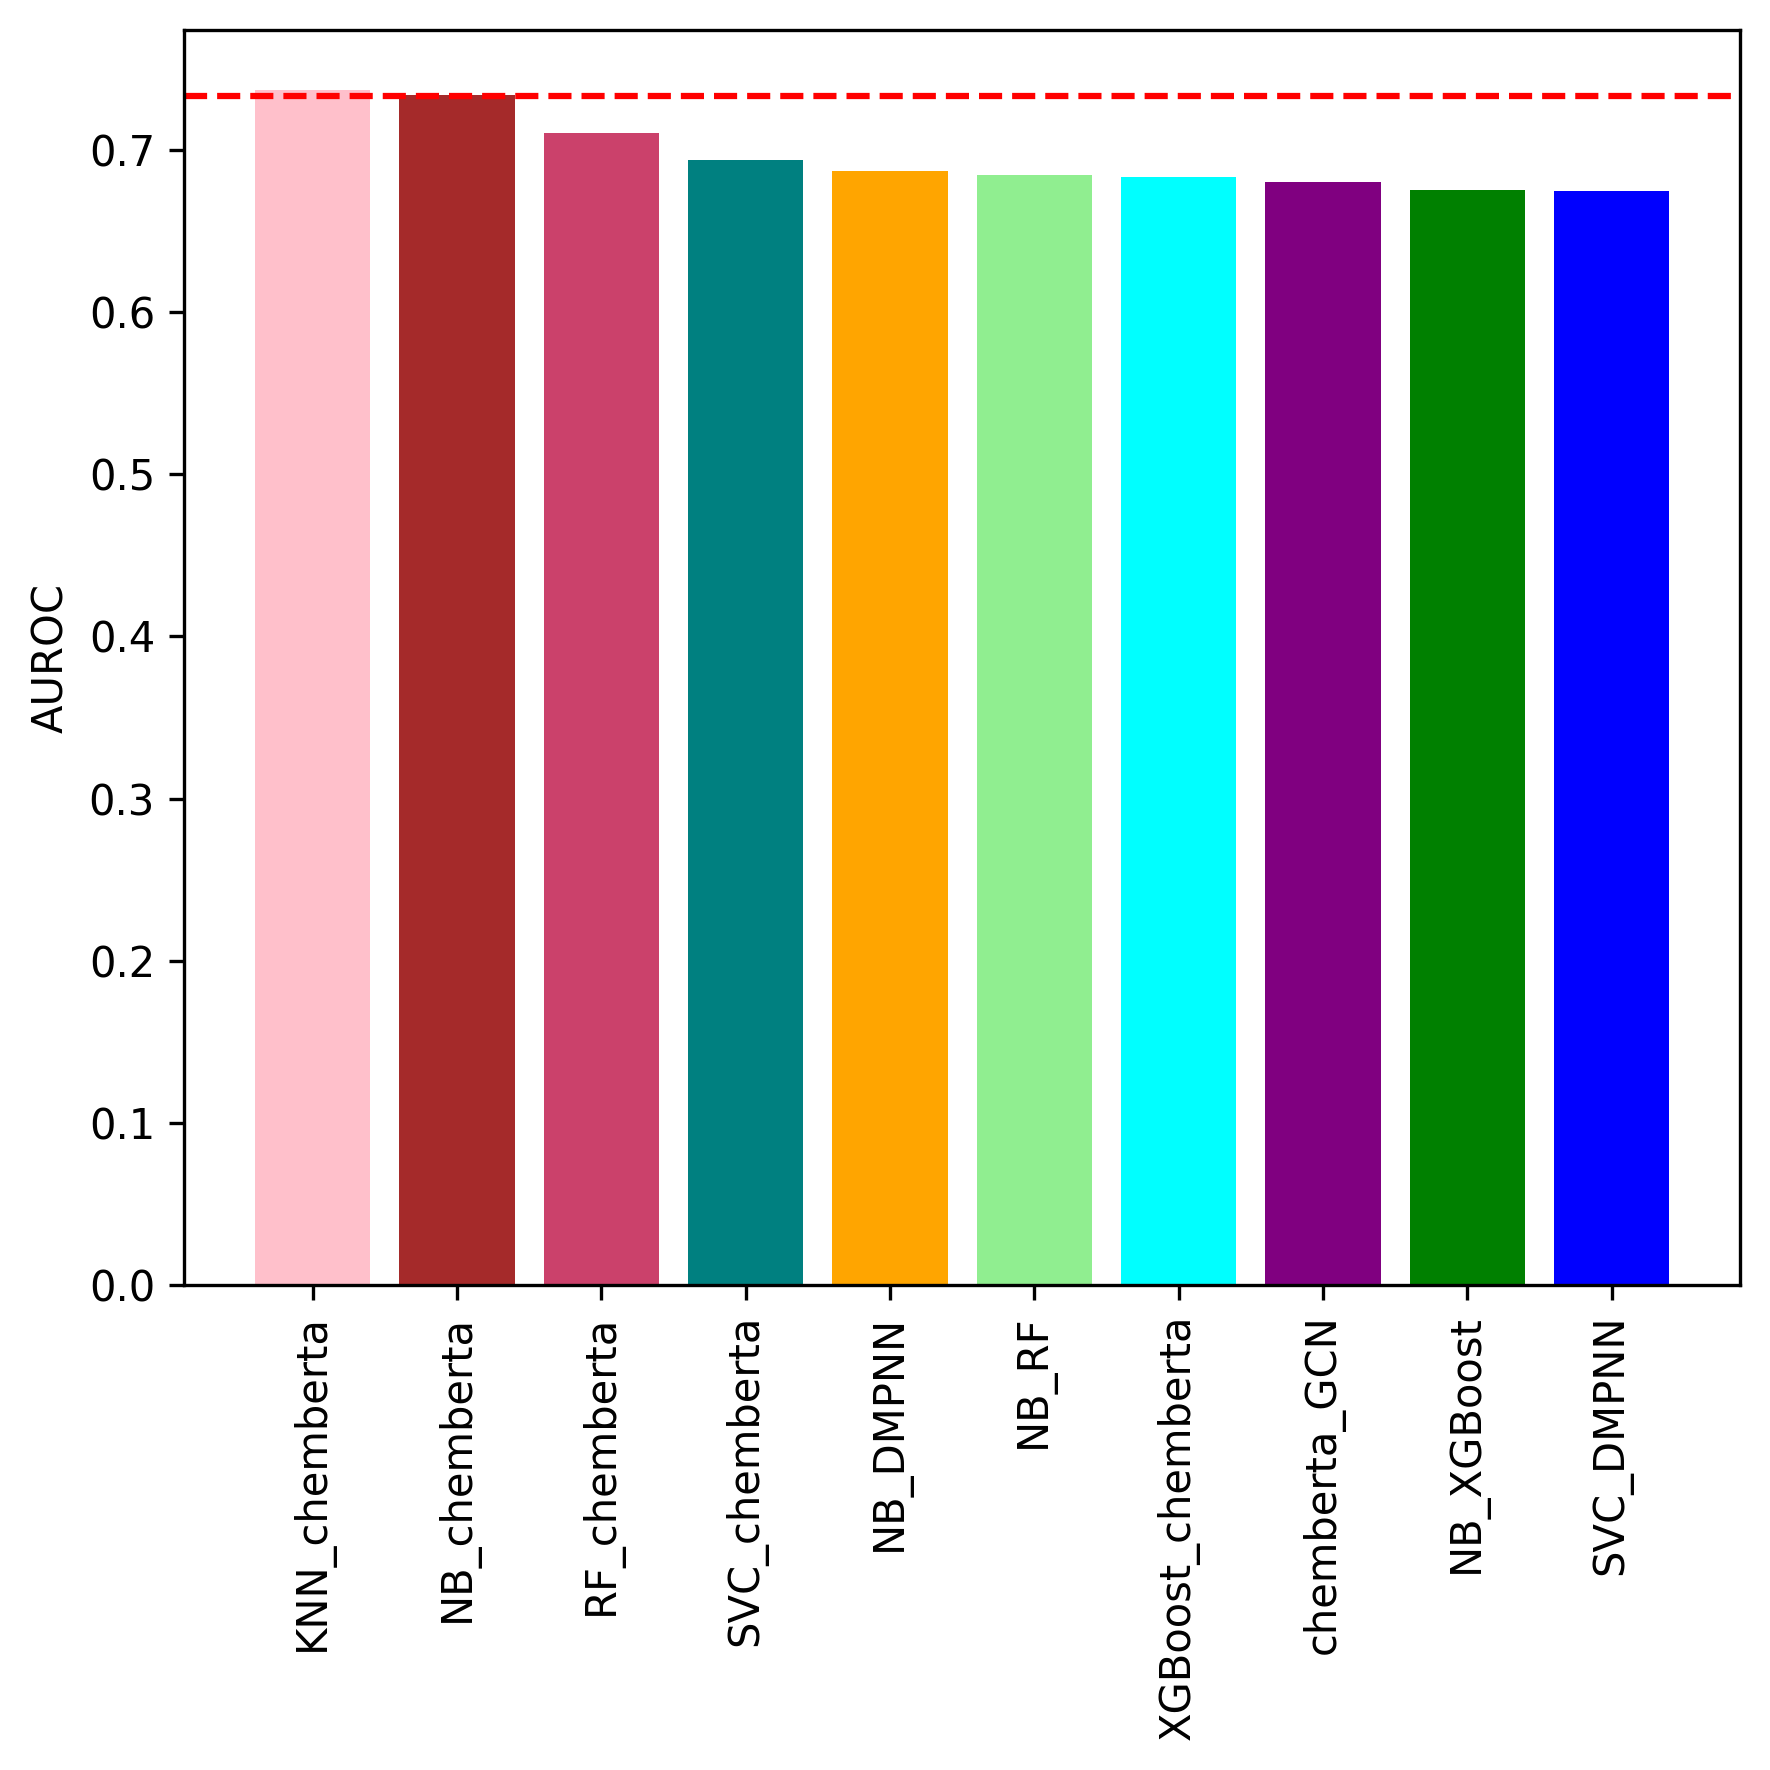

TCM2000_80t 0.8064469840119876
{'SVC_DMPNN': 0.8397371724136206, 'NB_DMPNN': 0.8393935948570072, 'NB_chemberta': 0.8330949704288164, 'KNN_chemberta': 0.8297587382684409, 'KNN_DMPNN': 0.8266812491618729, 'RF_DMPNN': 0.8253991132679065, 'RF_chemberta': 0.8169369138107918, 'NB_GCN': 0.8124201365245213, 'chemberta_GCN': 0.8122919776542109, 'SVC_chemberta': 0.8114011507112376}


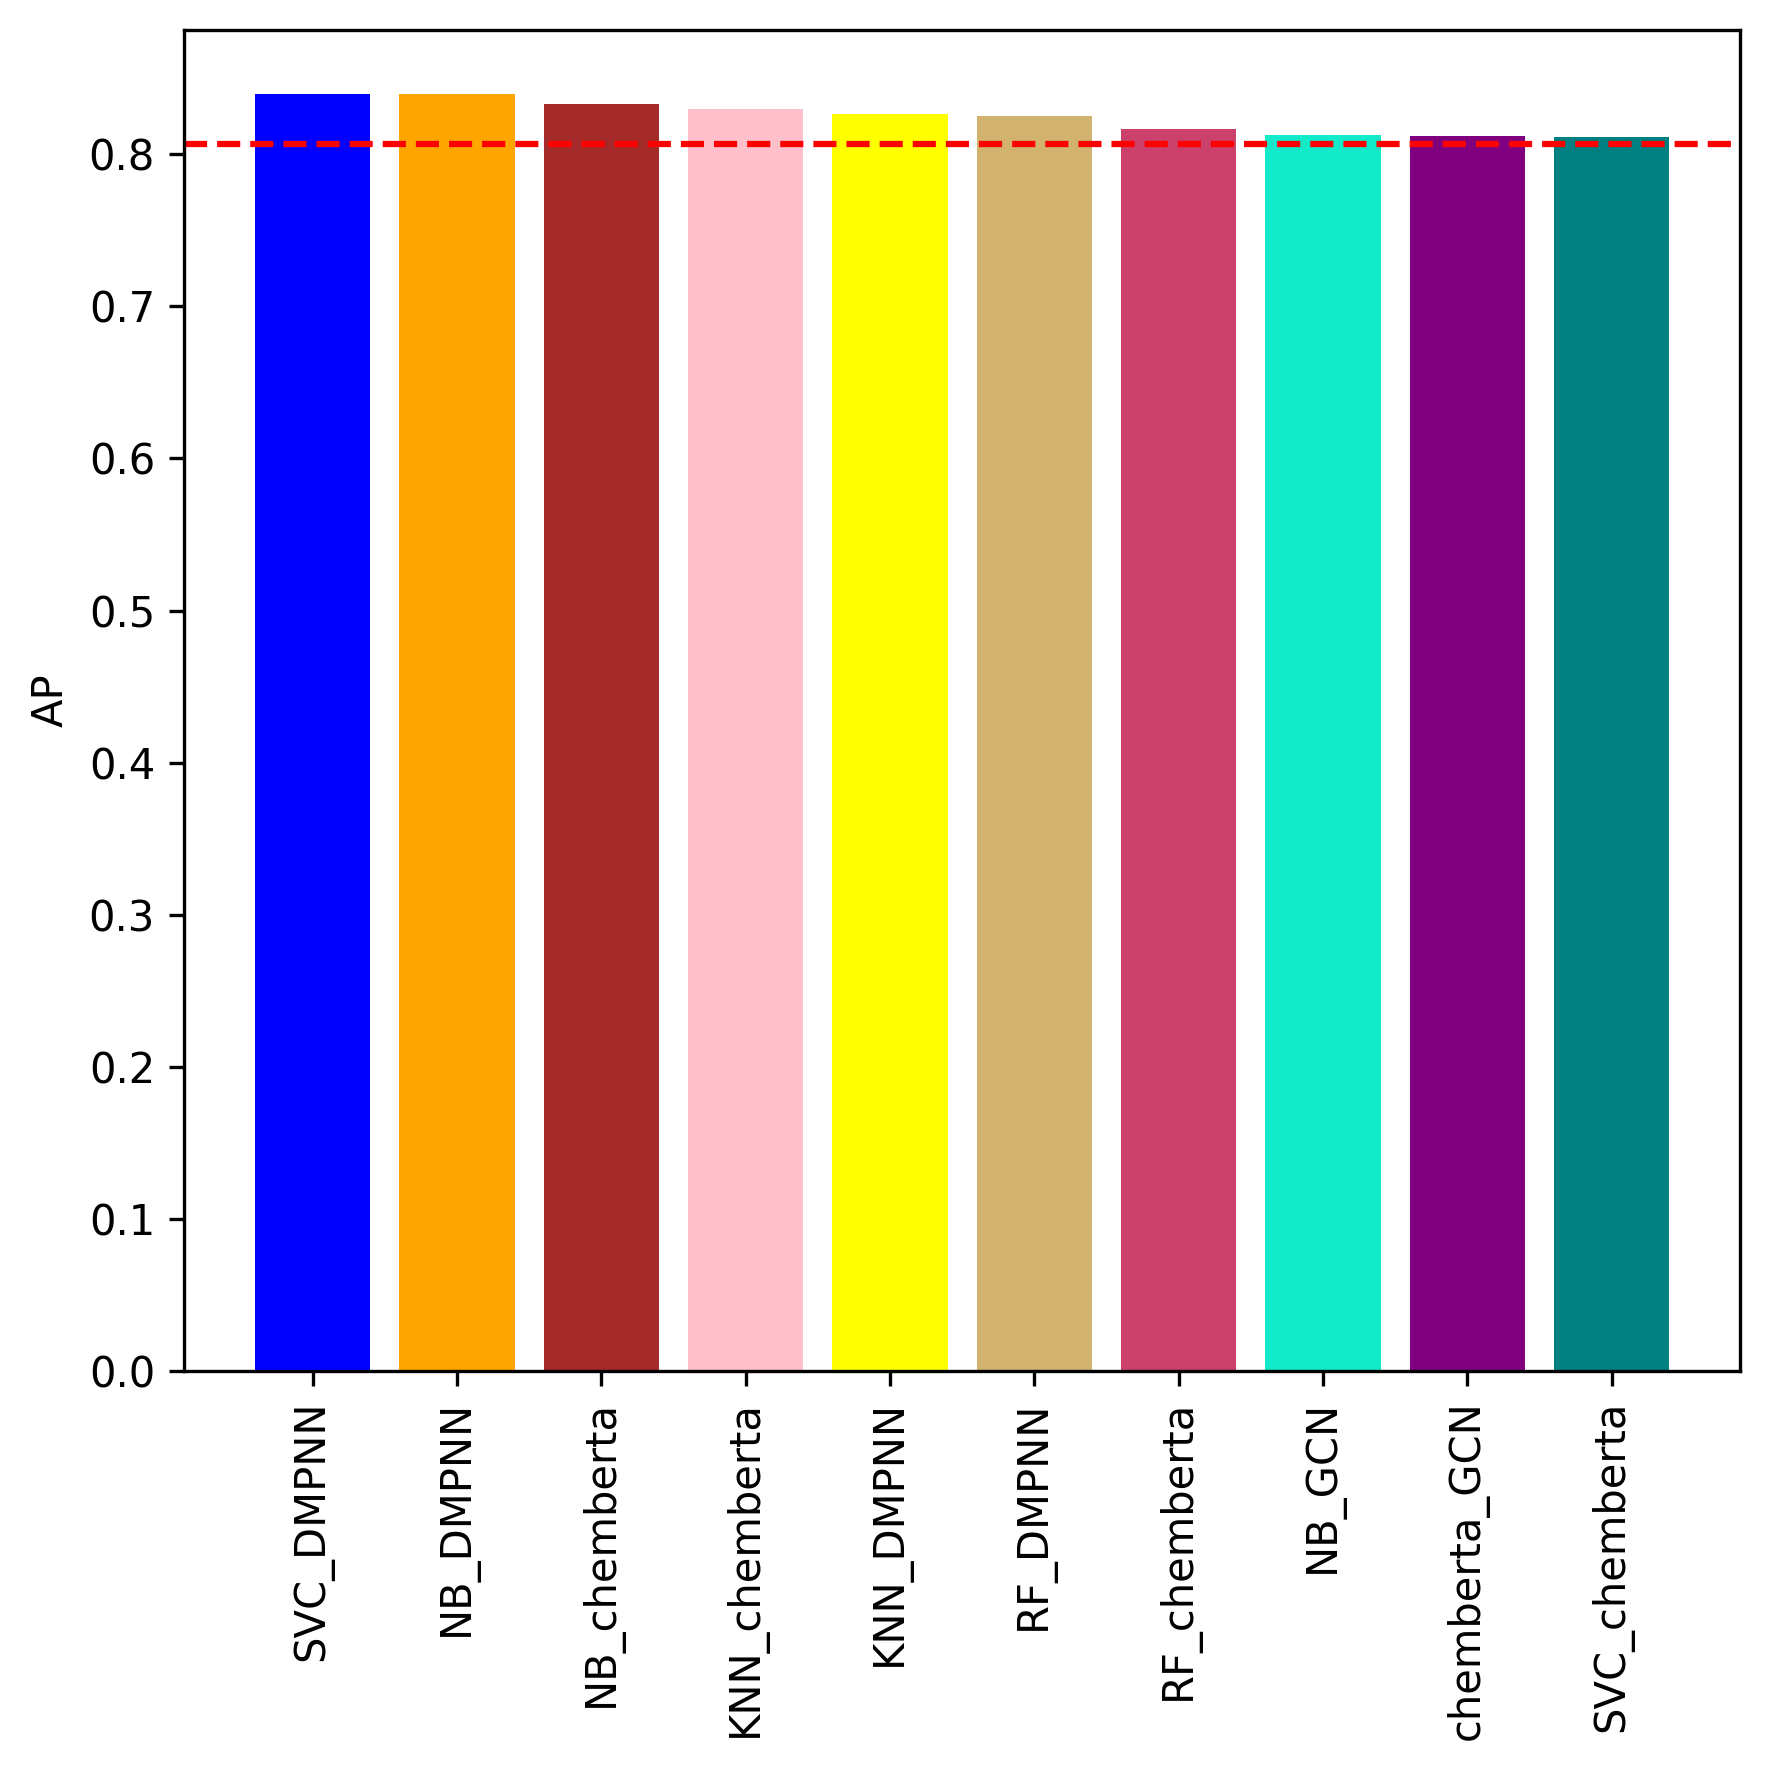

TCM2000_80t 0.6084179977042343
{'RF_XGBoost': 0.5867601775098816, 'XGBoost_DMPNN': 0.5795225763698186, 'SVC_XGBoost': 0.578026335290447, 'KNN_XGBoost': 0.5726332828318044, 'XGBoost_AttentiveFP': 0.5667102535017812, 'XGBoost_chemberta': 0.5601305572319323, 'XGBoost_GCN': 0.5427508358409999, 'KNN_NB': 0.5427342674229719, 'NB_XGBoost': 0.5420215251147664, 'NB_RF': 0.5353688297356454}


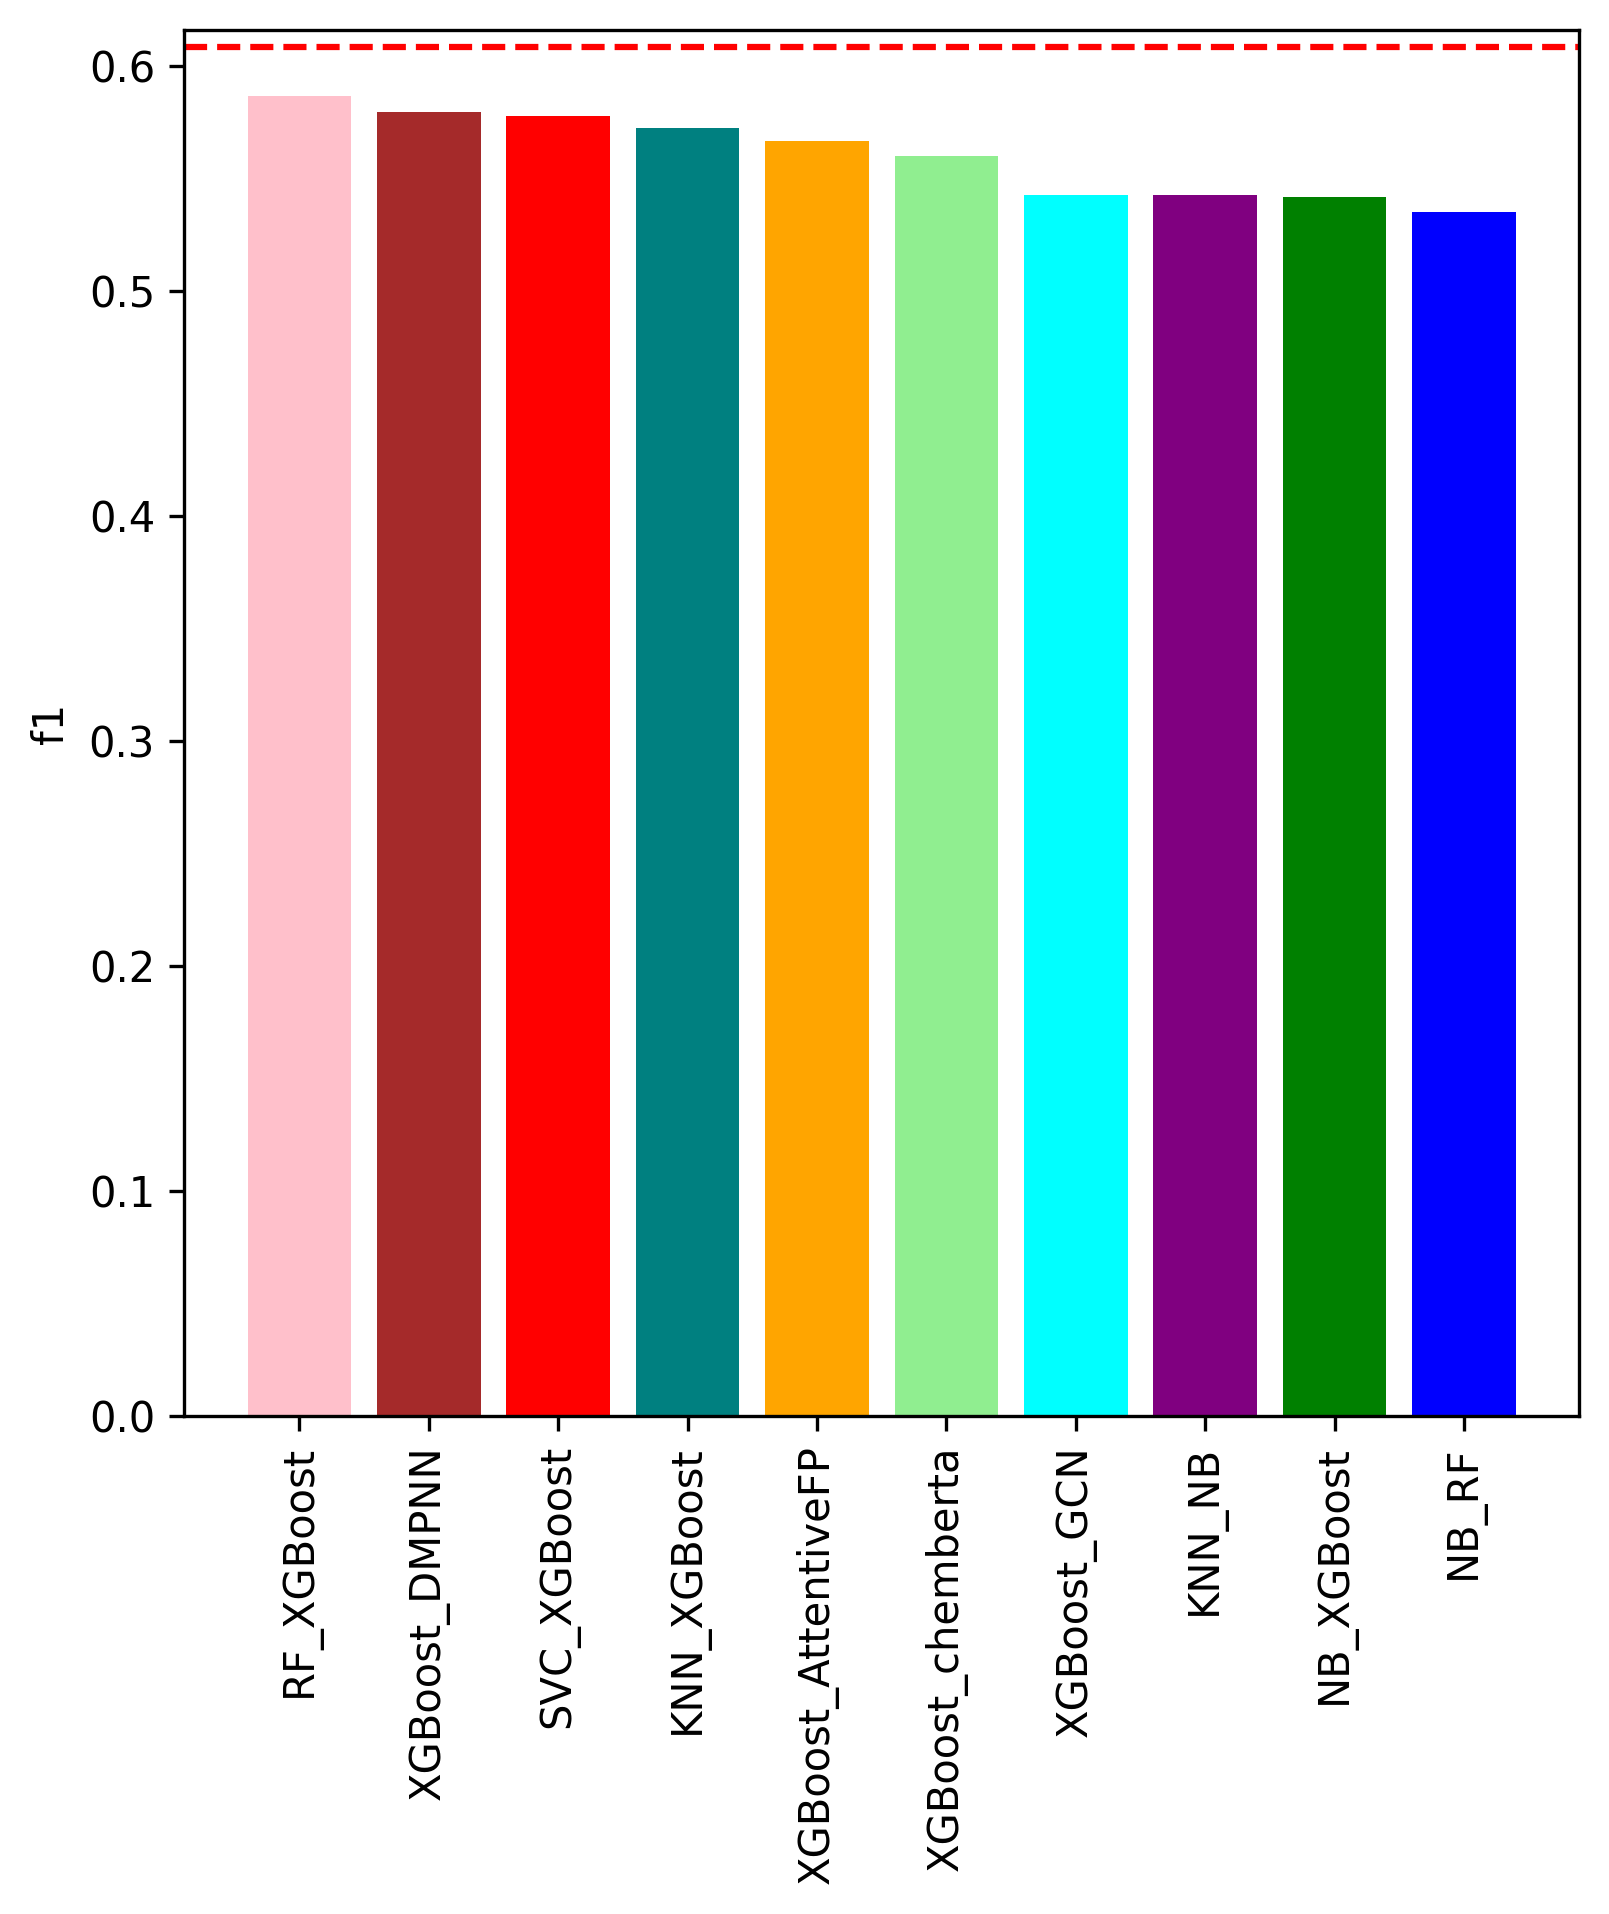

TCM2000_80t 0.21204025425075992
{'XGBoost_chemberta': 0.2271955495246937, 'SVC_chemberta': 0.2145797248414399, 'chemberta_DMPNN': 0.2142017753111096, 'RF_chemberta': 0.2048599446653088, 'AttentiveFP_chemberta': 0.2007807914352107, 'chemberta_GCN': 0.1980769061966237, 'NB_chemberta': 0.1877602368970856, 'NB_DMPNN': 0.1875662139246783, 'NB_XGBoost': 0.1852874947032987, 'NB_RF': 0.1831924730083661}


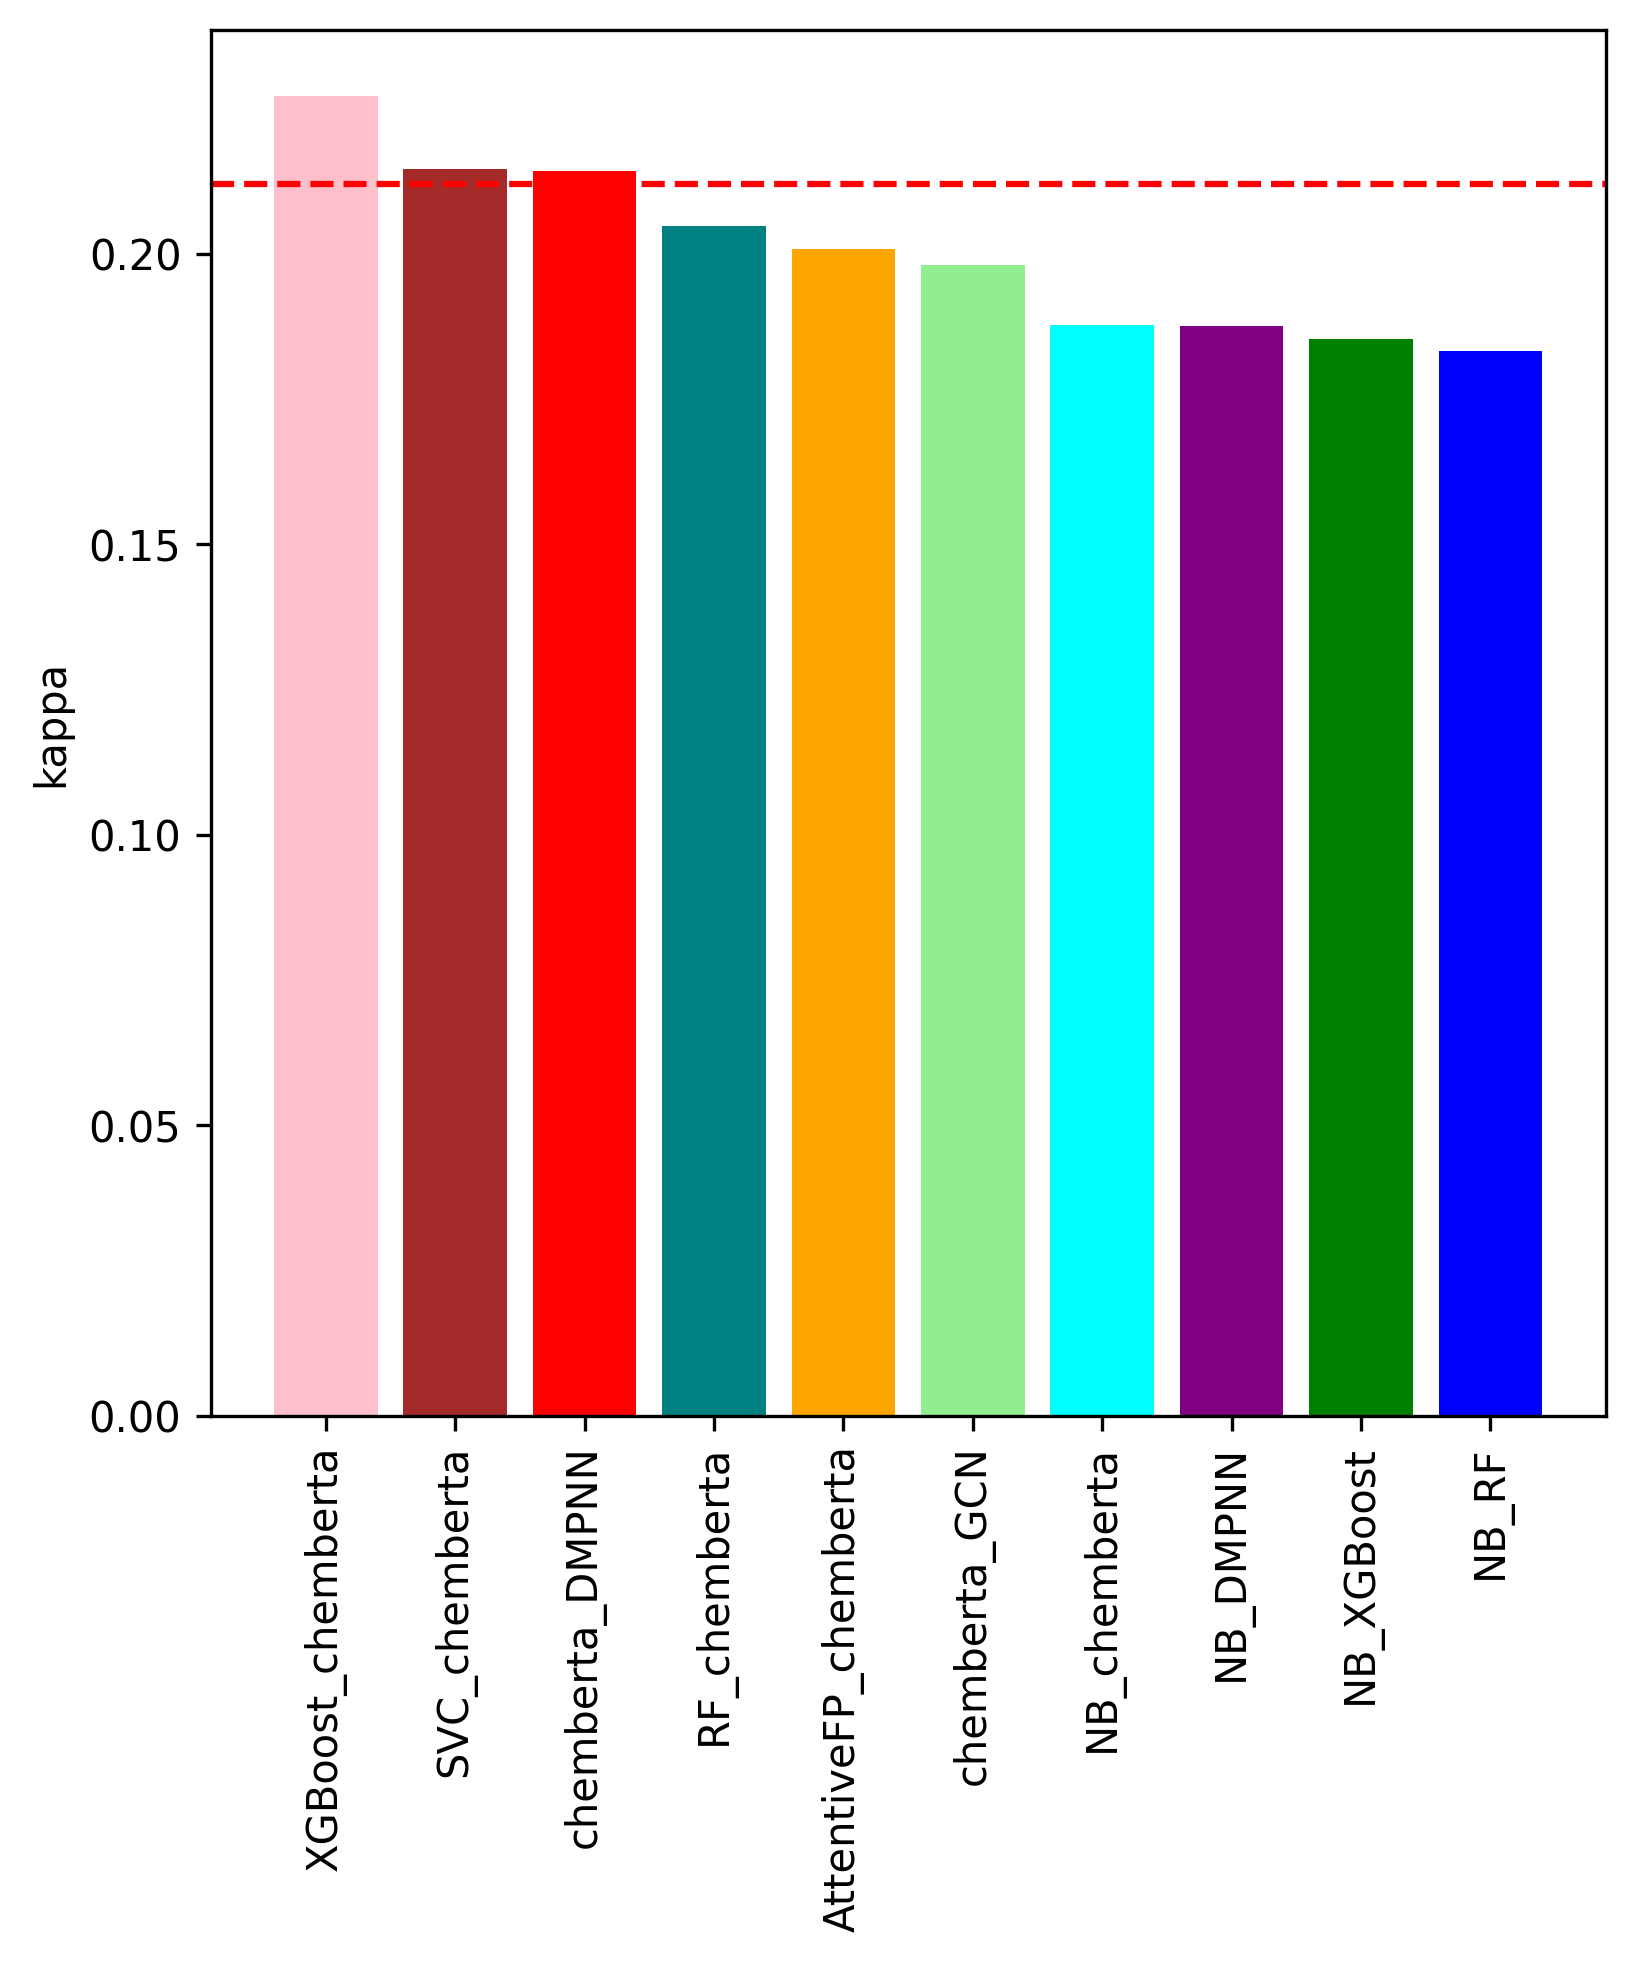

In [32]:
# 两个模型consensus 画图

df = pd.read_excel("consensus_2_auc.xlsx")
for key, value in max_auc_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.figure(figsize=(6,6),dpi=300)
        plt.bar(keys, values, color=['pink','brown','#cb416b','teal','orange','lightgreen','aqua', 'purple','green','blue'])

        # 添加标题和标签
        #plt.title(key)
        #plt.xlabel('consensus model 2')
        plt.ylabel('AUROC')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')

        plt.tight_layout()
        plt.savefig('./consensus_auroc.jpg')
        plt.show()

df = pd.read_excel("consensus_2_ap.xlsx")
for key, value in max_ap_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.figure(figsize=(6,6),dpi=300)
        plt.bar(keys, values, color=['blue', 'orange', 'brown', 'pink', 'yellow', '#d1b26f', '#cb416b', '#13eac9', 'purple', 'teal'])

        # 添加标题和标签
        #plt.title(key)
        #plt.xlabel('consensus model 2')
        plt.ylabel('AP')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')

        plt.tight_layout()
        plt.savefig('./consensus_ap.jpg')
        plt.show()

df = pd.read_excel("consensus_2_f1.xlsx")
for key, value in max_f1_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.figure(figsize=(6,6),dpi=300)
        plt.bar(keys, values, color=['pink','brown','red','teal','orange','lightgreen','aqua', 'purple','green','blue'])

        # 添加标题和标签
        #plt.title(key)
        #plt.xlabel('consensus model 2')
        plt.ylabel('f1')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')

        #图片暂不保存
        #plt.tight_layout()
        #plt.savefig('./consensus_f1.jpg')
        plt.show()

df = pd.read_excel("consensus_2_kappa.xlsx")
for key, value in max_kappa_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.figure(figsize=(6,6),dpi=300)
        plt.bar(keys, values, color=['pink','brown','red','teal','orange','lightgreen','aqua', 'purple','green','blue'])

        # 添加标题和标签
        #plt.title(key)
        #plt.xlabel('consensus model 2')
        plt.ylabel('kappa')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')

        #图片暂不保存
        #plt.tight_layout()
        #plt.savefig('./consensus_kappa.jpg')
        plt.show()

TCM2000_80t 0.733015730776463
{'KNN_NB_chemberta': 0.734762123831728, 'KNN_chemberta_DMPNN': 0.7214935998067182, 'KNN_XGBoost_chemberta': 0.7180063234237845, 'NB_RF_chemberta': 0.7172336129219767, 'KNN_SVC_chemberta': 0.7152763506599131, 'KNN_chemberta_GCN': 0.7149888075204711, 'KNN_RF_chemberta': 0.7114764193859102, 'NB_SVC_DMPNN': 0.7076405792751429, 'KNN_AttentiveFP_chemberta': 0.7064639244928017, 'RF_SVC_chemberta': 0.7064271606839297}


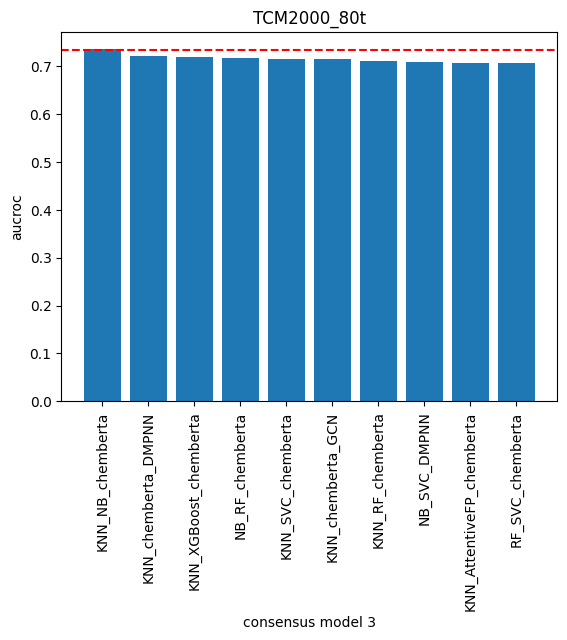

TCM2000_80t 0.8064469840119876
{'NB_SVC_DMPNN': 0.8496283834434958, 'KNN_chemberta_DMPNN': 0.8471432178607846, 'NB_RF_DMPNN': 0.8428822408084407, 'NB_chemberta_DMPNN': 0.8404189626765053, 'RF_chemberta_DMPNN': 0.8376941381663019, 'KNN_NB_DMPNN': 0.8375052026159303, 'SVC_chemberta_DMPNN': 0.8353838919681111, 'RF_SVC_DMPNN': 0.8342680235241353, 'NB_DMPNN_GCN': 0.8330676180239796, 'KNN_SVC_DMPNN': 0.8329244652008313}


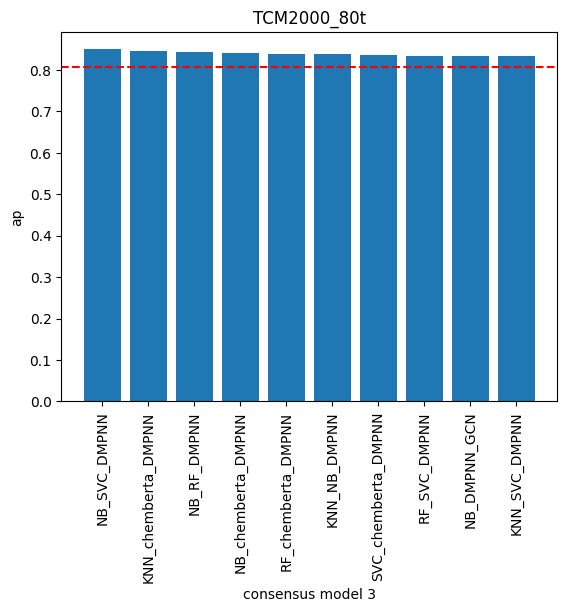

TCM2000_80t 0.6084179977042343
{'KNN_NB_XGBoost': 0.5787415779601448, 'NB_XGBoost_DMPNN': 0.5779683289988852, 'RF_XGBoost_AttentiveFP': 0.5675543742414173, 'XGBoost_AttentiveFP_GCN': 0.5661692448618647, 'XGBoost_chemberta_DMPNN': 0.5605856534580604, 'SVC_XGBoost_GCN': 0.555223572403849, 'NB_chemberta_DMPNN': 0.554757242097596, 'RF_XGBoost_DMPNN': 0.5524023763049064, 'KNN_XGBoost_chemberta': 0.5521230059496499, 'SVC_XGBoost_AttentiveFP': 0.5496963676668416}


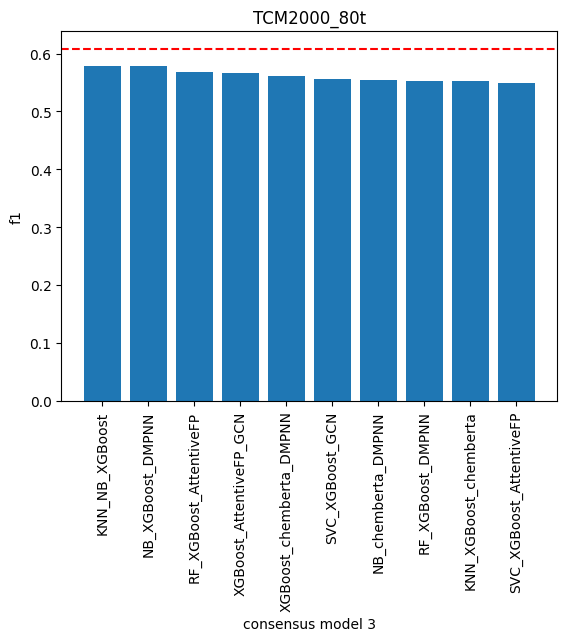

TCM2000_80t 0.21204025425075992
{'NB_chemberta_DMPNN': 0.2237861827641444, 'KNN_NB_XGBoost': 0.2125800002817617, 'RF_chemberta_DMPNN': 0.2096603781661174, 'SVC_chemberta_DMPNN': 0.2081457568798449, 'chemberta_DMPNN_GCN': 0.2050490089278635, 'NB_SVC_DMPNN': 0.2048630672574509, 'RF_AttentiveFP_chemberta': 0.2018781119248877, 'NB_RF_DMPNN': 0.1981895558202721, 'RF_chemberta_GCN': 0.1980254661581979, 'NB_RF_XGBoost': 0.1977895385170026}


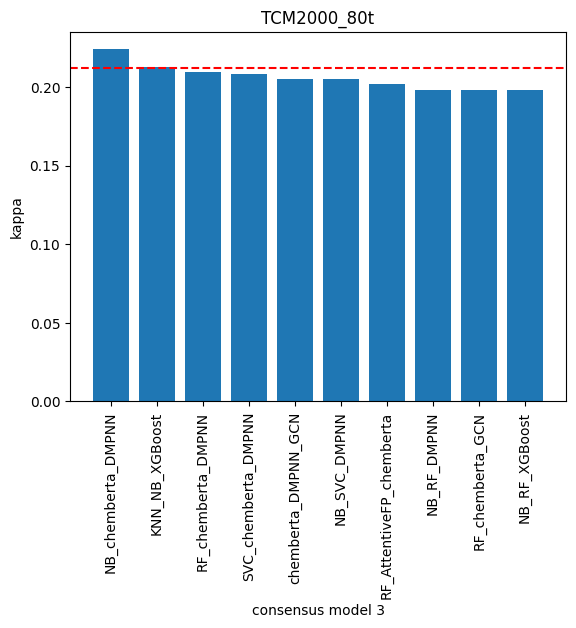

In [6]:
# 三个模型consensus 画图

df = pd.read_excel("consensus_3_auc.xlsx")
for key, value in max_auc_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')
        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('consensus model 3')
        plt.ylabel('aucroc')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')

        plt.show()

df = pd.read_excel("consensus_3_ap.xlsx")
for key, value in max_ap_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('consensus model 3')
        plt.ylabel('ap')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("consensus_3_f1.xlsx")
for key, value in max_f1_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('consensus model 3')
        plt.ylabel('f1')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()

df = pd.read_excel("consensus_3_kappa.xlsx")
for key, value in max_kappa_scores.items():

    # 只关注TCM2000_80t
    if key == 'TCM2000_80t':
        print(key,value)
        dict1 = df.iloc[3].to_dict()
        dict1.pop('Dataset Name')

        dict1 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
        # 只保留前十个键值对
        dict1 = dict(list(dict1.items())[:10])
        
        print(dict1)

        keys = list(dict1.keys())
        values = list(dict1.values())

        # 创建柱状图
        plt.bar(keys, values)

        # 添加标题和标签
        plt.title(key)
        plt.xlabel('consensus model 3')
        plt.ylabel('kappa')
        plt.xticks(rotation=90)
        plt.axhline(y=value, color='r', linestyle='--')


        plt.show()